In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

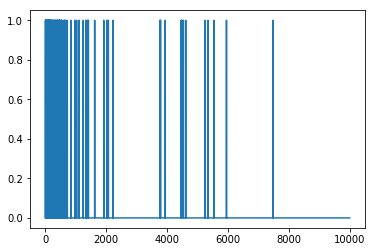

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 28s - loss: 0.4638 - acc: 0.8110 - binary_crossentropy: 0.4638 - val_loss: 0.3194 - val_acc: 0.8777 - val_binary_crossentropy: 0.3194
Epoch 2/20
 - 18s - loss: 0.2358 - acc: 0.9141 - binary_crossentropy: 0.2358 - val_loss: 0.2838 - val_acc: 0.8868 - val_binary_crossentropy: 0.2838
Epoch 3/20
 - 15s - loss: 0.1736 - acc: 0.9387 - binary_crossentropy: 0.1736 - val_loss: 0.2950 - val_acc: 0.8845 - val_binary_crossentropy: 0.2950
Epoch 4/20
 - 14s - loss: 0.1383 - acc: 0.9527 - binary_crossentropy: 0.1383 - val_loss: 0.3260 - val_acc: 0.8780 - val_binary_crossentropy: 0.3260
Epoch 5/20
 - 16s - loss: 0.1150 - acc: 0.9616 - binary_crossentropy: 0.1150 - val_loss: 0.3573 - val_acc: 0.8713 - val_binary_crossentropy: 0.3573
Epoch 6/20
 - 14s - loss: 0.0941 - acc: 0.9708 - binary_crossentropy: 0.0941 - val_loss: 0.3939 - val_acc: 0.8681 - val_binary_crossentropy: 0.3939
Epoch 7/20
 - 16s - loss: 0.0773 - acc: 0.9778 - binary_crosse

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.6413 - acc: 0.6358 - binary_crossentropy: 0.6413 - val_loss: 0.5870 - val_acc: 0.7621 - val_binary_crossentropy: 0.5870
Epoch 2/20
 - 17s - loss: 0.5076 - acc: 0.8370 - binary_crossentropy: 0.5076 - val_loss: 0.4429 - val_acc: 0.8603 - val_binary_crossentropy: 0.4429
Epoch 3/20
 - 17s - loss: 0.3377 - acc: 0.9024 - binary_crossentropy: 0.3377 - val_loss: 0.3277 - val_acc: 0.8830 - val_binary_crossentropy: 0.3277
Epoch 4/20
 - 16s - loss: 0.2499 - acc: 0.9194 - binary_crossentropy: 0.2499 - val_loss: 0.2946 - val_acc: 0.8876 - val_binary_crossentropy: 0.2946
Epoch 5/20
 - 14s - loss: 0.2083 - acc: 0.9314 - binary_crossentropy: 0.2083 - val_loss: 0.2857 - val_acc: 0.8872 - val_binary_crossentropy: 0.2857
Epoch 6/20
 - 16s - loss: 0.1809 - acc: 0.9396 - binary_crossentropy: 0.1809 - val_loss: 0.2821 - val_acc: 0.8884 - val_binary_crossentropy: 0.2821
Epoch 7/20
 - 15s - loss: 0.1605 - acc: 0.9478 - binary_crosse

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 33s - loss: 0.3507 - acc: 0.8497 - binary_crossentropy: 0.3507 - val_loss: 0.2960 - val_acc: 0.8785 - val_binary_crossentropy: 0.2960
Epoch 2/20
 - 17s - loss: 0.1433 - acc: 0.9478 - binary_crossentropy: 0.1433 - val_loss: 0.3560 - val_acc: 0.8654 - val_binary_crossentropy: 0.3560
Epoch 3/20
 - 17s - loss: 0.0518 - acc: 0.9838 - binary_crossentropy: 0.0518 - val_loss: 0.4176 - val_acc: 0.8675 - val_binary_crossentropy: 0.4176
Epoch 4/20
 - 17s - loss: 0.0093 - acc: 0.9985 - binary_crossentropy: 0.0093 - val_loss: 0.5769 - val_acc: 0.8692 - val_binary_crossentropy: 0.5769
Epoch 5/20
 - 16s - loss: 0.0011 - acc: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.6638 - val_acc: 0.8705 - val_binary_crossentropy: 0.6638
Epoch 6/20
 - 16s - loss: 2.7433e-04 - acc: 1.0000 - binary_crossentropy: 2.7433e-04 - val_loss: 0.7025 - val_acc: 0.8708 - val_binary_crossentropy: 0.7025
Epoch 7/20
 - 18s - loss: 1.6397e-04 - acc: 1.0000 - b

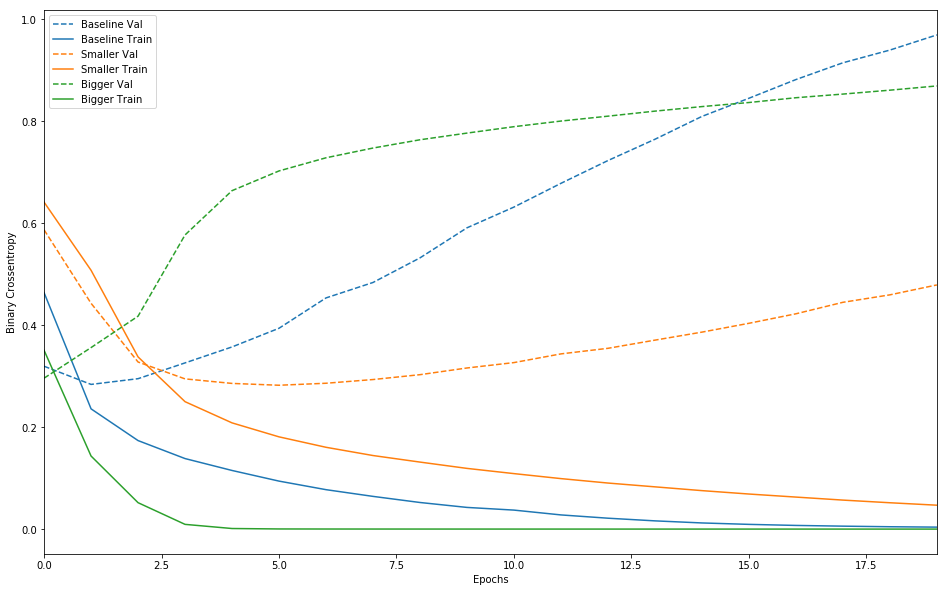

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 20s - loss: 0.5095 - acc: 0.8111 - binary_crossentropy: 0.4677 - val_loss: 0.3686 - val_acc: 0.8798 - val_binary_crossentropy: 0.3255
Epoch 2/20
 - 17s - loss: 0.2959 - acc: 0.9115 - binary_crossentropy: 0.2491 - val_loss: 0.3338 - val_acc: 0.8872 - val_binary_crossentropy: 0.2844
Epoch 3/20
 - 16s - loss: 0.2479 - acc: 0.9317 - binary_crossentropy: 0.1963 - val_loss: 0.3386 - val_acc: 0.8856 - val_binary_crossentropy: 0.2853
Epoch 4/20
 - 18s - loss: 0.2230 - acc: 0.9422 - binary_crossentropy: 0.1682 - val_loss: 0.3533 - val_acc: 0.8820 - val_binary_crossentropy: 0.2973
Epoch 5/20
 - 16s - loss: 0.2102 - acc: 0.9487 - binary_crossentropy: 0.1527 - val_loss: 0.3664 - val_acc: 0.8782 - val_binary_crossentropy: 0.3079
Epoch 6/20
 - 15s - loss: 0.1970 - acc: 0.9536 - binary_crossentropy: 0.1378 - val_loss: 0.3843 - val_acc: 0.8748 - val_binary_crossentropy: 0.3246
Epoch 7/20
 - 15s - loss: 0.1892 - acc: 0.9574 - binary_crosse